# ENPH 213 - Week 9 Lab

In this lab, we will be working on numerically solving ordinary differential equations and continuing to develop your Python skills.

When you are finished, please rename this notebook to LastName_ENPH213_Lab9, where LastName is your last name.  Submit that file to onQ.

For marking Parts 1-4 will be marked together (Weighted out of 10) and Part 5 (if delivered) will be marked out of 5.

# Part 1

Consider the ordinary differential equation:

$\large \frac{dy}{dx} = -\frac{xy}{4}$

Solve numerically for y(x) for $-8 \leq x \leq 8$ with an intial condition that $y(0) = 1$.  

In solving this problem, develop code using Euler's method for positive $x$ (Forward) and negative $x$ (Backward).  Using 101 points in each region (positive $x$ and negative $x$), plot the curves on a single graph.

Then starting wit 101 points, use your code for the Backward Euler's method to test covergence.  Determine the number of points needed to satisfy this convergence condition:

$\Large \frac{\sum_i^{N+1} y(x_i)}{N+1} - \frac{\sum_i^N y(x_i)}{N} < 1 \times10^{-6}$


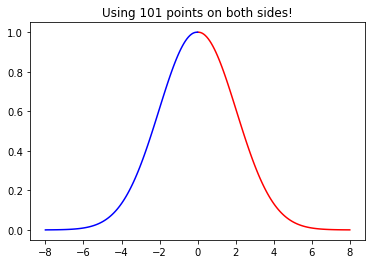



Points needed to meet the convergence value: 596




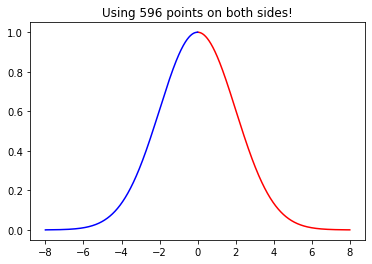

In [232]:
#Libraries
import numpy as np
from matplotlib import pyplot as plt

#Initial Conditions and Range
rangeBegin = -8
rangeEnd = 8
rangeMid = 0
initialCond = 1
convergeCond = 10**(-6)
initN = 101

#function that needs to be integrated
def fxy(x,y):
    return -(1/4)*x*y

#Forward Euler Method
def ODEForward(N,f):
    #x values and calculating h
    xVal = np.linspace(rangeMid,rangeEnd,N)
    h = (xVal[-1]-xVal[0])/(N-1)
    
    #setting the initial condition
    yVal = np.zeros(N)
    yVal[0] = initialCond
    
    #Looping through the rest, starting at 0 -> rangeEnd
    for i in range(1,N):
        yVal[i] = yVal[i-1]+(h*f(xVal[i-1],yVal[i-1]))
    
    #Return our values
    return xVal,yVal

#Backwards Euler Method
def ODEBackward(N,f):
    #x values and calculating h 
    xVal = np.linspace(rangeBegin,rangeMid,N)
    h = (xVal[-1]-xVal[0])/(N-1)
    
    #setting the same initial condition
    yVal = np.zeros(N)
    yVal[N-1] = initialCond
    
    #Looping through from rangeBegin->0
    for i in range(N-1,1,-1):
        yVal[i-1] = yVal[i]-(h*f(xVal[i],yVal[i]))

    #Return
    return xVal,yVal

#Let's get our two "chunks"
xF,yF = ODEForward(101,fxy)
xB,yB = ODEBackward(101,fxy)

#Plot them!
plt.plot(xF,yF,'r')
plt.plot(xB,yB,'b')
plt.title("Using 101 points on both sides!")
plt.show()

#Time to test convergence!
def TestConverge(condition,Nstart):
    #N+1
    Nnext = Nstart+1
    
    #Calculate the y values
    xstart,ystart = ODEBackward(Nstart,fxy)
    xnext,ynext = ODEBackward(Nnext,fxy)
    
    #Loop until the condition is met
    while np.abs((np.sum(ynext)/Nnext)-(np.sum(ystart)/Nstart)) > condition:
        Nstart = Nnext
        Nnext+=1
        
        xstart,ystart = ODEBackward(Nstart,fxy)
        xnext,ynext = ODEBackward(Nnext,fxy)
    
    #Return the needed points
    return Nstart

#Run the convergence test
NVal = TestConverge(convergeCond,101)

print("\n")
print("Points needed to meet the convergence value:", NVal)
print("\n")

#Print the converged number of points!
xCon,yCon = ODEForward(NVal,fxy)
xCon2,yCon2 = ODEBackward(NVal,fxy)

plt.plot(xCon,yCon,'r')
plt.plot(xCon2,yCon2,'b')
plt.title("Using " + str(NVal) + " points on both sides!")
plt.show()

# Part 2

Consider the ordinary differential equation:

$\large \frac{dy}{dx} = 100(\sin x - y)$

Solve numerically for y(x) for $0 \leq x \leq 8$ using 501 points and an intial condition that $y(0) = 0$.  

In solving this problem, develop code using the second order Runge-Katta Method with coefficients for mid-point form. Plot the curve on a graph.

Run your code two more times using 395 points and 400 points.  Plot the curves and comment on any discrepancies between the curves.

For comparison, solve the ODE re-using code from your Euler's Method above.  Run the code for the same three number of points (501, 395, and 400), plot the curves, and comment on the results.



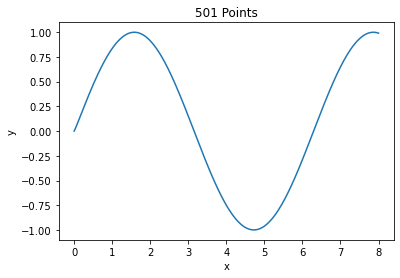

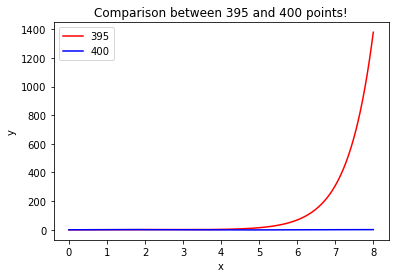

Here, the 395 point solution significantly detours from the standard solution, and rises towards infinity. 
This dwarfs the 400 point solution, which looks linear and flat in the printed graph. However, when viewed alone, 
the 400 point solution looks very similar to the 501 point solution above!


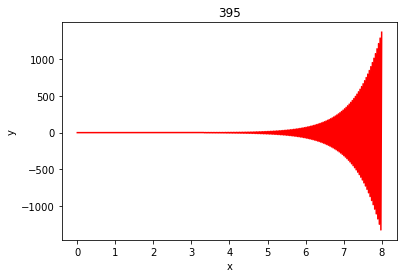

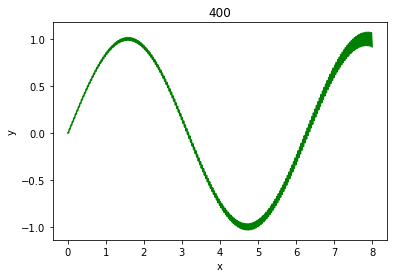

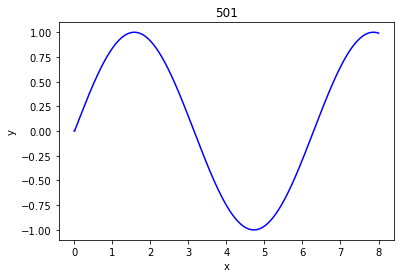

Here, the 501 points looks analogous to the SORKM method. The 395 points diverges the same as the graph shown above, but with a dichotomy in the positive and negative directions.
The 400 point method follows the general trend of the sinusoidal curve, but presents as a 'chunk' of points, with a varying thickness.


In [233]:
#Conditions needed
initialCond = 0
start = 0
end = 8
nPoints=501

#Function we want to use!
def f(x,y):
    return 100*(np.sin(x)-y)

#Runge-Katta Method for solving FODE
def SORKM(N,func):
    x = np.linspace(start,end,N)
    h = (x[-1]-x[0])/(N-1)
    
    #Initial Conditions
    y = np.zeros(N)
    y[0]=initCond
    
    #Loop thru the rest of the points using the equation provided
    for i in range(0,N-1):
        k = h*func(x[i],y[i])
        y[i+1] = y[i]+h*func(x[i]+h/2,y[i]+k/2)
    
    return x,y

xRK,yRK = SORKM(nPoints,f)

#Plot the 501
plt.plot(xRK,yRK)
plt.title("501 Points")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#Time to run on 395 and 400
x395,y395 = SORKM(395,f)
x400,y400 = SORKM(400,f)

plt.plot(x395,y395,'r')
plt.plot(x400,y400,'b')
plt.title("Comparison between 395 and 400 points!")
plt.legend(["395","400"])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print("""Here, the 395 point solution significantly detours from the standard solution, and rises towards infinity. 
This dwarfs the 400 point solution, which looks linear and flat in the printed graph. However, when viewed alone, 
the 400 point solution looks very similar to the 501 point solution above!""")

#Time to compare 1 and 2
x3E,y3E = ODEForward(395,f)
x4E,y4E = ODEForward(400,f)
x5E,y5E = ODEForward(501,f)

plt.plot(x3E,y3E,'r')
plt.title("395")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

plt.plot(x4E,y4E,'g')
plt.title("400")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

plt.plot(x5E,y5E,'b')
plt.title("501")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print("""Here, the 501 points looks analogous to the SORKM method. The 395 points diverges the same as the graph shown above, but with a dichotomy in the positive and negative directions.
The 400 point method follows the general trend of the sinusoidal curve, but presents as a 'chunk' of points, with a varying thickness.""")

# Part 3

The following ODEs are a simple model of a viral endemic:

The change in the number of Susceptible individuals (S) depends on their number, the number of Infected individuals (I), and the rate of infection (a)

$\large \frac{dS}{dt} = -aSI$

Similarly, the change in the number of Infected individuals mirrors the S-relation, but also includes a rate of recovery (r) of the Infected individuals (I)

$\large \frac{dI}{dt} = +aSI - rI$

Finally, the number of Recovered individuals (R) who are immune to re-infection changes as a function of the recovery rate and infected individuals

$\large \frac{dR}{dt} = rI$

Consider a city of 100,001 people (such as Kingston), all of whom are susceptible.  

a) If a single infectious individual enters the city at t = 0, use Euler's Method to compute the progression of the epidemic by looking at a period of 90 days. Plot the time-dependent populations on a single graph, and output the final numbers of each population. (Using Floats instead of integers is acceptable)

In the simulation, use the following parameters: 

Without intervention, it has been estimated that an infected Covid 19 individual will infect an average of 2.5 people over a period one week of being contagious (before symptoms).  So, let a = 2.5 / 7 / 100,001 = $3.571 \times 10^{-6}$ /person /day -- the proportion of people in the city an individual infects per day.

The typical recovery time is 14 days, so the rate is r = 1/14 = 0.0714/day.

b) The new Covid 19 variants can be 50% more infectious.  Run the simulation again, but with an infection rate that is 50% larger. (Output final values + graph)

c) Consider the effect of recovered individuals losing their immunity to the virus after a period of 60 days or at a rate of 1/(60 days).  Adjust you differential equations to account for this occurence and run the simulation again using the variant infection rate.  (Output final values + graph)

**QUESTION:  What seems to happen to the populations if immunity is lost?**

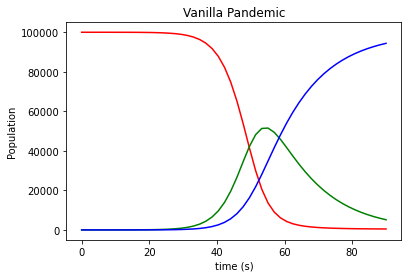

The remaining succeptable individuals:  467
The current infected infividuals:  5146
The total recovered individuals:  94387


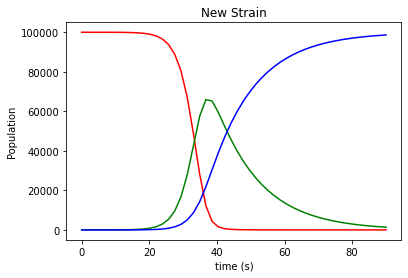

The remaining succeptable individuals:  6
The current infected infividuals:  1383
The total recovered individuals:  98612


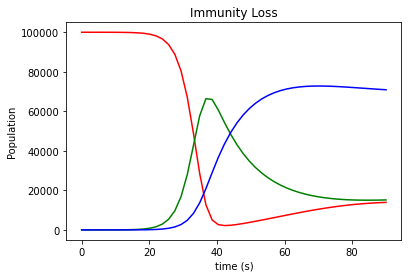

The remaining succeptable individuals:  13928
The current infected infividuals:  15169
The recovered/currently immune individuals:  70903


In [234]:
#Initial differential equations
def dSdt(a,S,I):
    return -a*S*I

def dIdt(a,S,I,r):
    return a*S*I-r*I

def dRdt(r,I):
    return r*I

#Part A
a = 3.571*10**(-6)
r = 0.0714
population = 100001
SInit = population
IInit = 1
RInit = 0
timeStart = 0
timeEnd = 90

#a --> rate of infection
#r --> rate of recovery
#S --> Succeptible individuals
#I --> Infected individuals
#R --> Recovered Individuals
#fS --> S function
#fI --> I function
#fR --> R function
def Simulation(a,r,S,I,R,fS,fI,fR):
    t = np.linspace(timeStart,timeEnd)
    N = len(t)
    h = (t[-1]-t[0])/(N-1)
    
    Sreturn = np.zeros(N)
    Ireturn = np.zeros(N)
    Rreturn = np.zeros(N)
    
    #Initial Conditions
    Sreturn[0]=S
    Ireturn[0]=I
    Rreturn[0]=R
    
    #Iterate for S,I and R each rotation thru t
    for i in range(1,N):
        Sreturn[i] = Sreturn[i-1]+(h*fS(a,Sreturn[i-1],Ireturn[i-1]))
        Ireturn[i] = Ireturn[i-1]+(h*fI(a,Sreturn[i-1],Ireturn[i-1],r))
        Rreturn[i] = Rreturn[i-1]+(h*fR(r,Ireturn[i-1]))
        
    return Sreturn,Ireturn,Rreturn

s,i,r = Simulation(a,r,SInit,IInit,RInit,dSdt,dIdt,dRdt)
t = np.linspace(timeStart,timeEnd)

plt.plot(t,s,'r')
plt.plot(t,i,'g')
plt.plot(t,r,'b')
plt.title("Vanilla Pandemic")
plt.xlabel("time (s)")
plt.ylabel("Population")
plt.show()

#Output final numbers
print("The remaining succeptable individuals: ", int(s[len(s)-1]))
print("The current infected infividuals: ", int(i[len(i)-1]))
print("The total recovered individuals: ", int(r[len(r)-1]))

#Part B
a = 1.5*(3.571*10**(-6))
r = 0.0714
population = 100001
SInit = population
IInit = 1
RInit = 0
timeStart = 0
timeEnd = 90

s,i,r = Simulation(a,r,SInit,IInit,RInit,dSdt,dIdt,dRdt)
t = np.linspace(timeStart,timeEnd)

plt.plot(t,s,'r')
plt.plot(t,i,'g')
plt.plot(t,r,'b')
plt.title("New Strain")
plt.xlabel("time (s)")
plt.ylabel("Population")
plt.show()

#Output final numbers
print("The remaining succeptable individuals: ", int(s[len(s)-1]))
print("The current infected infividuals: ", int(i[len(i)-1]))
print("The total recovered individuals: ", int(r[len(r)-1]))

#Part C
#New Functions which include the Recovered - R
def dSdtNew(a,S,I,R):
    return -a*S*I+(1/60)*R

def dIdtNew(a,S,I,r):
    return a*S*I-r*I

def dRdtNew(r,I,R):
    return r*I-(1/60)*R

a = 1.5*(3.571*10**(-6))
r = 0.0714
population = 100001
SInit = population
IInit = 1
RInit = 0
timeStart = 0
timeEnd = 90

#a --> rate of infection
#r --> rate of recovery
#S --> Succeptible individuals
#I --> Infected individuals
#R --> Recovered Individuals
#fS --> S function
#fI --> I function
#fR --> R function
def Simulation2(a,r,S,I,R,fS,fI,fR):
    t = np.linspace(timeStart,timeEnd)
    N = len(t)
    h = (t[-1]-t[0])/(N-1)
    
    Sreturn = np.zeros(N)
    Ireturn = np.zeros(N)
    Rreturn = np.zeros(N)
    
    Sreturn[0]=S
    Ireturn[0]=I
    Rreturn[0]=R
    
    for i in range(1,N):
        Sreturn[i] = Sreturn[i-1]+(h*fS(a,Sreturn[i-1],Ireturn[i-1],Rreturn[i-1]))
        Ireturn[i] = Ireturn[i-1]+(h*fI(a,Sreturn[i-1],Ireturn[i-1],r))
        Rreturn[i] = Rreturn[i-1]+(h*fR(r,Ireturn[i-1],Rreturn[i-1]))
        
    return Sreturn,Ireturn,Rreturn

s,i,r = Simulation2(a,r,SInit,IInit,RInit,dSdtNew,dIdtNew,dRdtNew)
t = np.linspace(timeStart,timeEnd)

plt.plot(t,s,'r')
plt.plot(t,i,'g')
plt.plot(t,r,'b')
plt.title("Immunity Loss")
plt.xlabel("time (s)")
plt.ylabel("Population")
plt.show()

#Output final numbers
print("The remaining succeptable individuals: ", int(s[len(s)-1]))
print("The current infected infividuals: ", int(i[len(i)-1]))
print("The recovered/currently immune individuals: ", int(r[len(r)-1]))

# Part 4

Consider a mass on a spring sliding horizontally of a frictionless table.  The differential equation that describes this motion is

$m \frac{d^2x}{dt^2} = -kx$

Consider a block of mass 2~kg and a spring constant of 225 N/m.  If at time t=0, the block is at rest and displaced by a distance of 10cm, code a solution for the time dependence of the block using the algorithm discussed in class.  Plot the curve for time $0 \leq t \leq 5s$, and use np.fft.fft() to verify the frequency $\omega = \sqrt{\frac{k}{m}}$. Use 501 points for the solution.

To the right hand side of the differential equation, add an external force of the form:

$F_{ext} = 5 \cos(\omega t)$

Then solve the ODE with this external force for $5 \leq \omega \leq 15$ in steps of 0.1.  For each $\omega$, extract the maximum displacement using np.amax().  Plot the max displacement vs. $\omega$ to observe the resonant excitation that corresponds with the frequency from your FFT.

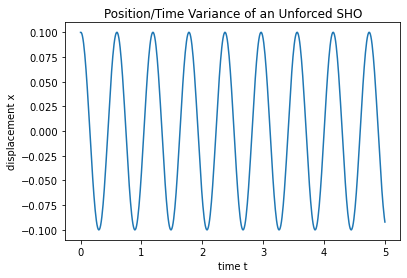

Expected frequency: 10.606601717798213
Observed frequency: 10.053096491487338


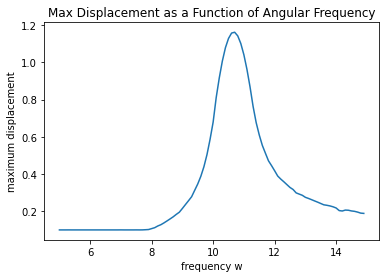

The maximum resonance occurs at:  10.69999999999998


In [235]:
#Initial conditions
m = 2
k = 225
xInit = 0.1
vInit = 0

#SODE
def Function2Ord(x):
    return -(k/m)*x

#Second Order Differential Equation Solver
def SODE(N,func):
    tVal = np.linspace(0,5,N)
    h = (tVal[-1]-tVal[0])/(N-1)
    
    #Setting Initial Conditions
    xVal = np.zeros(N)
    xValPrime = np.zeros(N)
    xVal[0] = xInit 
    xValPrime[0] = vInit
    
    #Looping thru using two separate "first-order" equations
    for i in range(1,N):
        xVal[i] = xVal[i-1]+(h*xValPrime[i-1])
        xValPrime[i] = xValPrime[i-1]+(h*(func(xVal[i])))
        
    return xVal

x = SODE(501,Function2Ord)
t = np.linspace(0,5,501)

#Plot!
plt.plot(t,x)
plt.xlabel("time t")
plt.ylabel("displacement x")
plt.title("Position/Time Variance of an Unforced SHO")
plt.show()

#Expected w value
wExpect = np.sqrt(k/m)

#Frequency domain and the buckets of frequency
yf = np.fft.fft(x)
ff = np.fft.fftfreq(len(x),5/(len(x)))

#Here, printing the max frequency in the frequency domain
print("Expected frequency:", np.sqrt(k/m))
print("Observed frequency:",2*np.pi*ff[np.argmax(yf)])

#Adding the forced term
def Function2OrdForced(x,w,t):
    return -(k/m)*x+(5*np.cos(w*t))

#Solving the Forced Term (basically just adding in w and t to the function call)
def SODEForced(N,func,w):
    tVal = np.linspace(0,5,N)
    h = (tVal[-1]-tVal[0])/(N-1)
    
    #initial conditions
    xVal = np.zeros(N)
    xValPrime = np.zeros(N)
    xVal[0] = xInit 
    xValPrime[0] = vInit
    
    #Loop thru using the first degree derivative again
    for i in range(1,N):
        xVal[i] = xVal[i-1]+(h*xValPrime[i-1])
        xValPrime[i] = xValPrime[i-1]+(h*(func(xVal[i],w,tVal[i])))
        
    return xVal

#Find the max displacement with each val of w
maxDisp = np.zeros(100)
for i in range(100):
    maxDisp[i] = np.amax(SODEForced(501,Function2OrdForced,5+(0.1*i)))
    
wVals = np.arange(5,15,0.1)

plt.plot(wVals,maxDisp)
plt.xlabel("frequency w")
plt.ylabel("maximum displacement")
plt.title("Max Displacement as a Function of Angular Frequency")
plt.show()

#Use amax to find the resonance point
print("The maximum resonance occurs at: ", wVals[np.argmax(maxDisp)])

# Part 5

Part 5 tbd.

## Acknowledgements

Please comment on any help that you received from your group members or others concerning this Lab assignment.